<a href="https://colab.research.google.com/github/ecsquare/Covid-19/blob/master/AI4D_Predict_the_Global_Spread_of_COVID_19(_Zindi_competition).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Get the latest data
!git clone https://github.com/CSSEGISandData/COVID-19

Cloning into 'COVID-19'...
remote: Enumerating objects: 14751, done.
remote: Total 14751 (delta 0), reused 0 (delta 0), pack-reused 14751
Receiving objects: 100% (14751/14751), 47.16 MiB | 38.66 MiB/s, done.
Resolving deltas: 100% (7092/7092), done.


In [0]:
import pandas as pd

In [0]:
cases = pd.read_csv('/content/COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Confirmed.csv')
deaths = pd.read_csv('/content/COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Deaths.csv')

In [5]:
cases.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20
0,NaN,Thailand,15.0000,101.0000,2,3,5,7,8,8,14,14,14,19,19,19,19,25,25,25,25,32,32,32,33,33,33,33,33,34,35,35,35,35,35,35,35,35,37,40,40,41,42,42,43,43,43,47,48,50,50,50,53,59,70,75,82,114,147,177
1,NaN,Japan,36.0000,138.0000,2,1,2,2,4,4,7,7,11,15,20,20,20,22,22,45,25,25,26,26,26,28,28,29,43,59,66,74,84,94,105,122,147,159,170,189,214,228,241,256,274,293,331,360,420,461,502,511,581,639,639,701,773,839,825,878
2,NaN,Singapore,1.2833,103.8333,0,1,3,3,4,5,7,7,10,13,16,18,18,24,28,28,30,33,40,45,47,50,58,67,72,75,77,81,84,84,85,85,89,89,91,93,93,93,102,106,108,110,110,117,130,138,150,150,160,178,178,200,212,226,243,266
3,NaN,Nepal,28.1667,84.2500,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
4,NaN,Malaysia,2.5000,112.5000,0,0,0,3,4,4,4,7,8,8,8,8,8,10,12,12,12,16,16,18,18,18,19,19,22,22,22,22,22,22,22,22,22,22,22,22,23,23,25,29,29,36,50,50,83,93,99,117,129,149,149,197,238,428,566,673


In [6]:
cases.describe

<bound method NDFrame.describe of      Province/State  Country/Region      Lat  ...  3/15/20  3/16/20  3/17/20
0               NaN        Thailand  15.0000  ...      114      147      177
1               NaN           Japan  36.0000  ...      839      825      878
2               NaN       Singapore   1.2833  ...      226      243      266
3               NaN           Nepal  28.1667  ...        1        1        1
4               NaN        Malaysia   2.5000  ...      428      566      673
..              ...             ...      ...  ...      ...      ...      ...
455  Cayman Islands  United Kingdom  19.3133  ...        1        1        1
456         Reunion          France -21.1351  ...        7        9        9
457             NaN        Barbados  13.1939  ...        0        0        2
458             NaN      Montenegro  42.5000  ...        0        0        2
459             NaN      The Gambia  13.4667  ...        0        0        1

[460 rows x 60 columns]>

In [8]:
cases.shape

(460, 60)

In [9]:
cases.columns

Index(['Province/State', 'Country/Region', 'Lat', 'Long', '1/22/20', '1/23/20',
       '1/24/20', '1/25/20', '1/26/20', '1/27/20', '1/28/20', '1/29/20',
       '1/30/20', '1/31/20', '2/1/20', '2/2/20', '2/3/20', '2/4/20', '2/5/20',
       '2/6/20', '2/7/20', '2/8/20', '2/9/20', '2/10/20', '2/11/20', '2/12/20',
       '2/13/20', '2/14/20', '2/15/20', '2/16/20', '2/17/20', '2/18/20',
       '2/19/20', '2/20/20', '2/21/20', '2/22/20', '2/23/20', '2/24/20',
       '2/25/20', '2/26/20', '2/27/20', '2/28/20', '2/29/20', '3/1/20',
       '3/2/20', '3/3/20', '3/4/20', '3/5/20', '3/6/20', '3/7/20', '3/8/20',
       '3/9/20', '3/10/20', '3/11/20', '3/12/20', '3/13/20', '3/14/20',
       '3/15/20', '3/16/20', '3/17/20'],
      dtype='object')

Adding Population info

In [0]:
!pip install countryinfo # Run if needed

In [0]:
from countryinfo import CountryInfo

pops = {}
fails = []

regions = sorted(deaths['Country/Region'].unique())
for r in regions:
  try:
    country = CountryInfo(r)
    pops[r] = country.info()['population']
  except:
    fails.append(r)
    print('No pop data for', r)

In [0]:
# Manual fixes
pops['Andorra'] = 76965
pops['Congo (Kinshasa)'] = 81340000
pops["Cote d'Ivoire"] = 24290000
pops['Cruise Ship'] = 2670 # Not included in competition
pops['Czechia'] = 10650000
pops['Holy See'] = 1000 # Also excluded since it's small and unique.
pops['Korea, South'] = 51470000
pops['North Macedonia'] = 2077000
pops['Reunion'] = 859959
pops['Serbia'] = 7022000
pops['Taiwan*'] = 23780000
pops['US'] = 372200000

In [13]:
# Adding in population as a column
cols = list(deaths.columns)
deaths['Population'] = deaths['Country/Region'].map(pops)
deaths = deaths[cols[:2]+['Population']+cols[2:]] # Nice ordering
deaths.head()

,Province/State,Country/Region,Population,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20
0,NaN,Thailand,64871000.0,15.0000,101.0000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
1,NaN,Japan,127080000.0,36.0000,138.0000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,2,4,4,5,6,6,6,6,6,6,6,6,10,10,15,16,19,22,22,27,29
2,NaN,Singapore,5469700.0,1.2833,103.8333,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,NaN,Nepal,27646053.0,28.1667,84.2500,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,NaN,Malaysia,30430500.0,2.5000,112.5000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2


Some Quick Visualizations


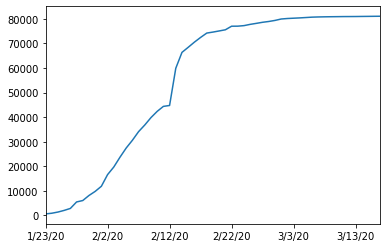

In [14]:
# Cases for mainland China (note - data is cumulative)
cases.groupby('Country/Region').sum().loc['China'][3:].plot()

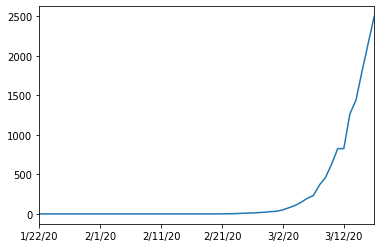

In [15]:
# Deaths in Italy
deaths.groupby('Country/Region').sum().loc['Italy'][3:].plot()

In [18]:
# Looking at raw numbers vs pop adjusted figures
grouped = deaths.groupby('Country/Region').sum()
# grouped['3/12/20'].sort_values(ascending=False).head(20) # Raw numbers
(grouped['3/12/20']*1e7/deaths.groupby('Country/Region').mean()['Population']).sort_values(ascending=False).head(20) # Scaled by population (deaths/10M people)

Country/Region
San Marino        916.226369
Italy             136.088896
Iran               55.023703
China              23.202230
Korea, South       12.823004
Guyana             12.740574
Spain              11.825983
Lebanon             7.309942
France              7.264142
Switzerland         4.887705
Albania             3.453102
Netherlands         2.961910
Panama              2.693014
Belgium             2.672494
Iraq                2.221941
Ireland             1.567890
Bulgaria            1.380133
Australia           1.265988
Japan               1.259049
United Kingdom      1.247940
dtype: float64

Dropping rows to match Zindi
We exclude unusual entries like the cruise ship data, to focus on large regions

In [19]:
deaths = deaths.loc[deaths.Population >10000] # Drops Cruise ship and Holy See
cases = cases.loc[cases['Country/Region'].isin(deaths['Country/Region'].unique())]
deaths.shape, cases.shape

((454, 61), (454, 60))

In [20]:
# Creating the 'reference' file

TEST_PERIOD = 7 # In days

test_dates = deaths.columns[-TEST_PERIOD:] # The last two weeks worth of data
countries = deaths.groupby('Country/Region').sum()[test_dates] # Group by country/region, and select only the columns for the test_period

# Create a new dataframe, with a Region X Date column. 
reference = pd.DataFrame({
    'Region X Date':list(map((lambda x: ' X '.join(x)), list(countries.stack().index.to_flat_index()))), # Check output to see what this is doing
    'target':countries.stack() # The target we'll be predicting: cumulative number of cases for a given region at a given date.
}).reset_index(drop=True) # Don't need the multiIndex created with Stack
reference.to_csv('reference.csv', index=False)
reference.head()

,Region X Date,target
0,Afghanistan X 3/11/20,0
1,Afghanistan X 3/12/20,0
2,Afghanistan X 3/13/20,0
3,Afghanistan X 3/14/20,0
4,Afghanistan X 3/15/20,0


In [21]:
# Sample submission is the same as the reference file, just with target set to 0
print(reference.target.sum())
ss = reference.copy()
ss['target'] = 0
print(ss.target.sum())
ss.to_csv('SampleSub.csv', index=False)

41980
0


In [22]:
# Scoring
from sklearn.metrics import mean_absolute_error

# Create some 'predictions
predictions = ss.copy()
predictions['target'] = 42 # These would be your actual predictions

# Calculate MAE
print('MAE: ', mean_absolute_error(reference['target'], predictions['target']))

MAE:  76.89432485322897


Matching the Zindi Submission File

The competition requires that you submit a file containing predictions for the whole of the time period between March 6 and June 7. The way it works is that only the relevant week's worth of predictions will be evaluated. Let's create an appropriate file

In [29]:
from google.colab import drive
drive.mount('/content/gdrive')


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [31]:
dates = pd.date_range(start='2020-03-06', end='2020-06-07', freq='1d')
ids = []
for c in sorted(deaths['Country/Region'].unique()):
  for d in dates:
    ids.append(c + ' X ' + d.strftime('%m/%d/%y'))
ss = pd.DataFrame({
    'Region X Date':ids,
    'target':0
})
ss.to_csv('/content/gdrive/My Drive/Colab Notebooks/SampleSubmission.csv', index=False)
ss.head()

,Region X Date,target
0,Afghanistan X 03/06/20,0
1,Afghanistan X 03/07/20,0
2,Afghanistan X 03/08/20,0
3,Afghanistan X 03/09/20,0
4,Afghanistan X 03/10/20,0


In [24]:
ss.tail()

,Region X Date,target
13719,Vietnam X 06/03/20,0
13720,Vietnam X 06/04/20,0
13721,Vietnam X 06/05/20,0
13722,Vietnam X 06/06/20,0
13723,Vietnam X 06/07/20,0


Creating 'Train.csv'

You can shape your training data in any way you want, provided that it does not include data from the test period. The goal is to predict into the future. While the competition is open, you could simply use all the available data for training and get a near-perfect score. However, this won't represent how well your model will do in the future. The final score will be based on new, unseen data based on events after the competition closes.

This is how the 'train.csv' file available from Zindi is generated:

In [25]:
train_dates = deaths.columns[5:-TEST_PERIOD]
country_deaths = deaths.groupby('Country/Region').sum()[train_dates] 
country_cases = cases.groupby('Country/Region').sum()[train_dates] 

train = pd.DataFrame({
    'Region X Date':list(map((lambda x: ' X '.join(x)), list(country_deaths.stack().index.to_flat_index()))), 
    'target':country_deaths.stack(),
    'cases':country_cases.stack() # Added as they may be useful
}).reset_index(drop=True)
train.to_csv('train.csv', index=False)
train.head()

,Region X Date,target,cases
0,Afghanistan X 1/22/20,0,0
1,Afghanistan X 1/23/20,0,0
2,Afghanistan X 1/24/20,0,0
3,Afghanistan X 1/25/20,0,0
4,Afghanistan X 1/26/20,0,0


In [26]:
train.shape

(7154, 3)

try simple regression 

In [28]:
ss.shape

(13724, 2)